In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import classification_report,accuracy_score
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

%cd '/content/gdrive/MyDrive'


Mounted at /content/gdrive/
/content/gdrive/MyDrive


In [ ]:
data_train=pd.read_csv("./Dataset/Dataset1/football_data.csv")

In [ ]:
data_train.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Nationality', 'Overall',
       'Potential', 'Club', 'Value', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Real Face', 'Position', 'Jersey Number', 'Joined',
       'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause',
       'Unnamed: 60'],
      dtype='object')

In [ ]:
pd.unique(data_train['Wage'])

array(['€565K', '€405K', '€290K', '€260K', '€355K', '€340K', '€420K',
       '€455K', '€380K', '€94K', '€205K', '€125K', '€285K', '€225K',
       '€145K', '€240K', '€315K', '€200K', '€130K', '€300K', '€215K',
       '€100K', '€255K', '€165K', '€265K', '€160K', '€150K', '€245K',
       '€110K', '€77K', '€115K', '€210K', '€195K', '€230K', '€250K',
       '€135K', '€155K', '€180K', '€175K', '€190K', '€185K', '€21K',
       '€82K', '€73K', '€92K', '€88K', '€96K', '€170K', '€66K', '€235K',
       '€28K', '€105K', '€38K', '€81K', '€57K', '€15K', '€63K', '€22K',
       '€84K', '€120K', '€90K', '€72K', '€93K', '€45K', '€74K', '€51K',
       '€42K', '€31K', '€75K', '€25K', '€140K', '€41K', '€78K', '€53K',
       '€95K', '€80K', '€43K', '€60K', '€85K', '€64K', '€67K', '€18K',
       '€70K', '€91K', '€20K', '€49K', '€87K', '€86K', '€26K', '€29K',
       '€55K', '€35K', '€33K', '€56K', '€30K', '€11K', '€59K', '€23K',
       '€46K', '€39K', '€32K', '€36K', '€98K', '€54K', '€68K', '€58K',
       '€2

In [ ]:
def func(x):
  if x[-1]=='M':
    return float(x[1:-1])*1000000
  if x[-1]=='K':
    return float(x[1:-1])*1000
  return 0
data_train['Wage'].apply(func)

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18207, dtype: float64

In [ ]:
data=data_train[['Age','Overall','Skill Moves', 'Potential','Weak Foot','Wage','Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']]

In [ ]:

std=preprocessing.StandardScaler()
def func(x):
  if x[-1]=='M':
    return float(x[1:-1])*1000000
  if x[-1]=='K':
    return float(x[1:-1])*1000
  return 0
data['Wage']=data['Wage'].apply(func)
data_std=std.fit_transform(data)

<ipython-input-8-71a83f88170e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Wage']=data['Wage'].apply(func)


In [ ]:
data=pd.DataFrame(data_std,columns=data.columns)
data['Position']=data_train['Position']
data=data.dropna()
one_hot = pd.get_dummies(data['Position'])
data=data.join(one_hot)
data=data.drop(['Position'],axis=1)

In [ ]:
data.shape

(18147, 67)

In [ ]:
pca = PCA(n_components=9)
X=pca.fit_transform(data)

In [ ]:
X.shape

(18147, 9)

In [ ]:
def preprocess(data):

  encoder=preprocessing.LabelEncoder()
  std=preprocessing.StandardScaler()
  one_hot = pd.get_dummies(data['Work Rate'])

  data=data.drop('Work Rate',axis=1)
  data=data.join(one_hot)
  encoder=preprocessing.LabelEncoder()

  one_hot = pd.get_dummies(data['Sex'])
  data=data.join(one_hot)
  data=data.drop(['Sex','.'],axis=1)


  return data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class KMeans:

    def __init__(self, K=5, max_iters=100, plot_steps=False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        self.clusters = [[] for _ in range(self.K)]

        self.centroids = []
        self.WCSS=0;

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        for _ in range(self.max_iters):
            self.clusters = self._create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            if self._is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        self._get_WCSS()
        return self._get_cluster_labels(self.clusters)


    def _get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx

        return labels


    def _create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def _closest_centroid(self, sample, centroids):
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)

        return closest_idx


    def _get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def _is_converged(self, centroids_old, centroids):
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0
    def _get_WCSS(self):
        for idx,clust in enumerate(self.clusters):
            point=self.centroids[idx];
            for points in clust:
              self.WCSS+=euclidean_distance(point, self.X[points])**2
    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()



In [ ]:
k_values=[1,3,5,7,9,11,13]
wcss=[]
for i in k_values:
  clust=KMeans(K=i)
  clust.predict(X)
  wcss.append(clust.WCSS)


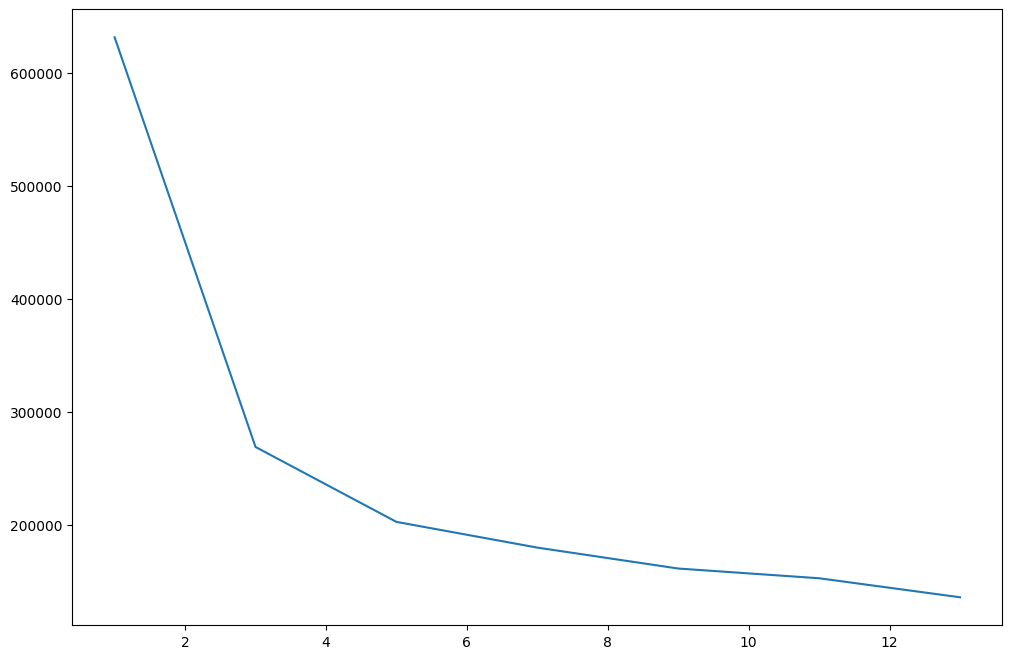

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(k_values,wcss)
plt.show()

In [17]:
from sklearn import metrics
k_values=[3,5,7,9,11,13]
score=[]
for i in k_values:
  clust=KMeans(K=i)
  labels=clust.predict(X)
  score.append(metrics.silhouette_score(X,labels,metric='euclidean'))

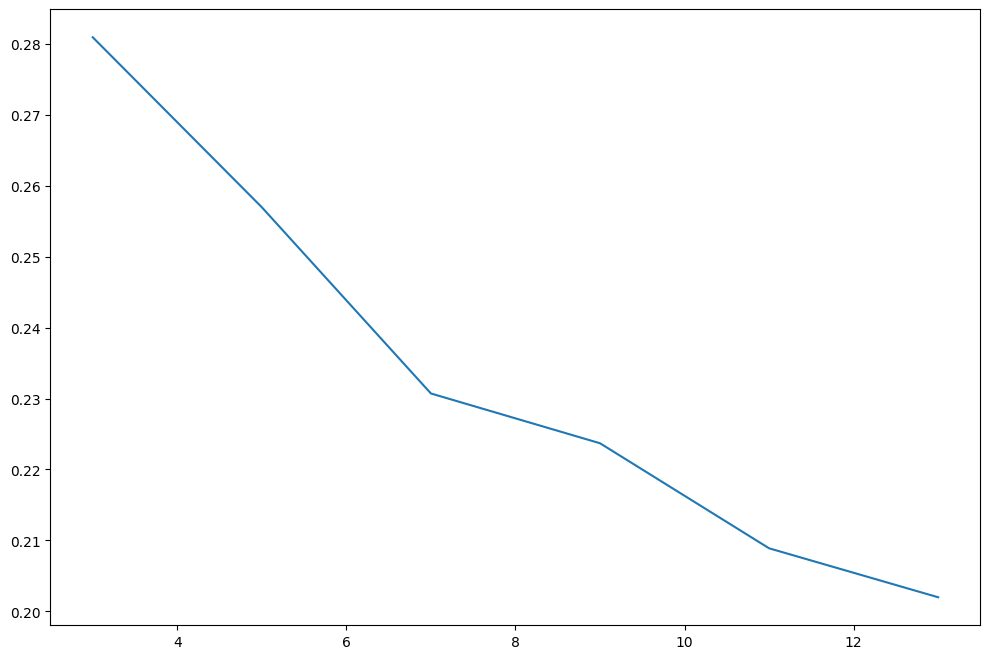

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(k_values,score)
plt.show()

As we can see for k=5 we get optimal clustering